# Analysis

In [1]:
import pandas as pd
import numpy as np
import statsmodels.api as sm
import seaborn as sns
from sklearn.neighbors import KNeighborsClassifier
from sklearn.cluster import KMeans
from sklearn.preprocessing import LabelEncoder,OneHotEncoder,StandardScaler


sns.set(rc={'figure.figsize':(12,8)})

In [2]:
class CustomeOneHotEncoder:
    def __init__(self,drop=False):
        self.columns_ = None
        self.drop_ = drop
        self.encoder = OneHotEncoder()
        
    def fit(self,data,columns):
        self.columns_ = columns
        self.encoder.fit(data[self.columns_])
    
    def fit_transform(self,data,columns):
        self.fit(data,columns)
        return self.transform(data)
    
    def transform(self,data):
        feature_array = self.encoder.transform(data[self.columns_]).toarray()
        feature_label = self.encoder.categories_
        new_feature_label = []
        for x,y in zip(self.columns_,feature_label):
            new_feature_label.append([x+'_'+str(z) for z in y])

        final_feature_label= np.concatenate([x for x in new_feature_label])
        encoded_df = pd.DataFrame(feature_array,columns=final_feature_label,index = data.index)

        if self.drop_:
            cols_to_drop = [x[0] for x in new_feature_label]
            encoded_df = encoded_df.drop(cols_to_drop,axis=1)
        data = data.drop(self.columns_,axis=1)   
        #return encoded_df
        return pd.concat([data,encoded_df],axis=1)
    


# Linear Regression

In [3]:
pd.options.display.max_rows=None

In [23]:
data = pd.read_csv('train_1.csv')

data.head()

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Total_Members,Title,Cabin_Codes,Age_Group,Multiply
0,1,0,3,male,22.0,1,0,7.2500,S,1,Mr,No_Cabin,2,66.0
1,2,1,1,female,38.0,1,0,71.2833,C,1,Mr,C,3,38.0
2,3,1,3,female,26.0,0,0,7.9250,S,0,Miss,No_Cabin,2,78.0
3,4,1,1,female,35.0,1,0,53.1000,S,1,Mr,C,2,35.0
4,5,0,3,male,35.0,0,0,8.0500,S,0,Mr,No_Cabin,2,105.0


In [24]:
data = data.sample(frac=1)

In [25]:
temp = data[(data['Survived'] == 0) ].iloc[:342,:]
temp2 = data[(data['Survived'] == 1) ]

In [30]:
data = pd.concat([temp,temp2]).sort_values(by='PassengerId')

In [31]:
data.head()

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Total_Members,Title,Cabin_Codes,Age_Group,Multiply
1,2,1,1,female,38.0,1,0,71.2833,C,1,Mr,C,3,38.0
2,3,1,3,female,26.0,0,0,7.9250,S,0,Miss,No_Cabin,2,78.0
3,4,1,1,female,35.0,1,0,53.1000,S,1,Mr,C,2,35.0
5,6,0,3,male,24.0,0,0,8.4583,Q,0,Mr,No_Cabin,2,72.0
8,9,1,3,female,27.0,0,2,11.1333,S,2,Mr,No_Cabin,2,81.0


In [36]:

dataset = data.copy()


## Train And test Dataset

In [37]:
y = dataset['Survived']
cols_to_drop = ['Survived','PassengerId','Parch', 'Fare','Age_Group', 'SibSp','Multiply','Cabin_Codes']
x = dataset.drop(cols_to_drop,axis=1)



In [38]:
x.columns.values

array(['Pclass', 'Sex', 'Age', 'Embarked', 'Total_Members', 'Title'],
      dtype=object)

In [39]:
encoder = CustomeOneHotEncoder(drop=True)
x = encoder.fit_transform(x,columns=['Pclass','Sex','Embarked','Title'])


In [40]:
scaler = StandardScaler()
x[['Total_Members','Age']] = scaler.fit_transform(x[['Total_Members','Age']])
x.head()

,Age,Total_Members,Pclass_2,Pclass_3,Sex_male,Embarked_Q,Embarked_S,Title_Col,Title_Countess,Title_Don,...,Title_Jonkheer,Title_Jr,Title_Major,Title_Master,Title_Miss,Title_Mlle,Title_Mme,Title_Mr,Title_Ms,Title_Rev
1,0.620895,0.063856,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
2,-0.248807,-0.608109,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
3,0.403470,0.063856,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
5,-0.393758,-0.608109,0.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
8,-0.176332,0.735822,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0


In [41]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression

In [42]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size = 0.2,random_state=32,shuffle=True)

x_train.shape,x_test.shape


print('Test Shape : {} , Train Shape {}'.format(x_test.shape,x_train.shape))

Test Shape : (137, 21) , Train Shape (547, 21)


# Modelling

In [43]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeClassifier # Import Decision Tree Classifier
from sklearn import metrics

### Statsmodels Logitics Regression

In [49]:
temp = sm.add_constant(x_train)
res = sm.Logit(y_train,temp)
res = res.fit()
#res = res

def get_accuracy(data_x,data_y,model):
    l = []
    for fo in model.predict(data_x).round(2):
        if fo >0.5:
            l.append(1)
        else:
            l.append(0)
    return accuracy_score(data_y,l)

print('Train Accuracy:', get_accuracy(sm.add_constant(x_train),y_train,res))
print('Test Accuracy:', get_accuracy(sm.add_constant(x_test),y_test,res))


         Current function value: 0.411640
         Iterations: 35
Train Accuracy: 0.8226691042047533
Test Accuracy: 0.7883211678832117


C:\Users\Office\Anaconda3\envs\tensorflowenv\lib\site-packages\statsmodels\base\model.py:568: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


In [50]:
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:               Survived   No. Observations:                  547
Model:                          Logit   Df Residuals:                      525
Method:                           MLE   Df Model:                           21
Date:                Sat, 29 Aug 2020   Pseudo R-squ.:                  0.4061
Time:                        22:34:58   Log-Likelihood:                -225.17
converged:                      False   LL-Null:                       -379.13
Covariance Type:            nonrobust   LLR p-value:                 7.742e-53
==================================================================================
                     coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------
const            -13.0185   1.79e+04     -0.001      0.999    -3.5e+04     3.5e+04
Age               -0.6301      0.170     -3.697      0.000      -0.964      -0.296
Total_Members     -0.7102      0.163     -4.368      0.000      -1.029      -0.392
Pclass_2          -1.6151      0.388     -4.164      0.000      -2.375      -0.855
Pclass_3          -2.6452      0.364     -7.265      0.000      -3.359      -1.932
Sex_male          -3.3864      0.390     -8.679      0.000      -4.151      -2.622
Embarked_Q        -0.1749      0.526     -0.332      0.740      -1.206       0.857
Embarked_S        -0.7994      0.315     -2.540      0.011      -1.416      -0.182
Title_Col        -23.2218   9.72e+08  -2.39e-08      1.000   -1.91e+09    1.91e+09
Title_Countess    41.0457   9.35e+05   4.39e-05      1.000   -1.83e+06    1.83e+06
Title_Don        -24.9348   9.72e+08  -2.56e-08      1.000   -1.91e+09    1.91e+09
Title_Dr          19.1790   1.79e+04      0.001      0.999    -3.5e+04     3.5e+04
Title_Jonkheer   -24.2267   9.72e+08  -2.49e-08      1.000   -1.91e+09    1.91e+09
Title_Jr          45.8586   9.35e+05   4.91e-05      1.000   -1.83e+06    1.83e+06
Title_Major       17.6432   1.79e+04      0.001      0.999    -3.5e+04     3.5e+04
Title_Master      20.7306   1.79e+04      0.001      0.999    -3.5e+04     3.5e+04
Title_Miss        16.7141   1.79e+04      0.001      0.999    -3.5e+04     3.5e+04
Title_Mlle        39.8357   9.35e+05   4.26e-05      1.000   -1.83e+06    1.83e+06
Title_Mme         39.8357   9.35e+05   4.26e-05      1.000   -1.83e+06    1.83e+06
Title_Mr          17.2929   1.79e+04      0.001      0.999    -3.5e+04     3.5e+04
Title_Ms          42.4320   9.35e+05   4.54e-05      1.000   -1.83e+06    1.83e+06
Title_Rev        -51.2011   9.99e+14  -5.12e-14      1.000   -1.96e+15    1.96e+15
==================================================================================
"""

In [51]:

res = LogisticRegression()
res = res.fit(x_train,y_train)
#print('Train Accuracy:', accuracy_score(y_train,res.predict(x_train)))
#print('Test Accuracy:', accuracy_score(y_test,res.predict(x_test)))

#print('Train Accuracy:' ,metrics.accuracy_score(y_train, res.predict(x_train)))
#print('Test Accuracy:' ,metrics.accuracy_score(y_test, res.predict(x_test)))


In [52]:
def get_accuracy(data_x,data_y,model):
    l = []
    for fo in model.predict(data_x).round(2):
        if fo >0.5:
            l.append(1)
        else:
            l.append(0)
    return accuracy_score(data_y,l)


In [53]:
print('Train Accuracy:', get_accuracy(x_train,y_train,res))
print('Test Accuracy:', get_accuracy(x_test,y_test,res))

Train Accuracy: 0.8244972577696527
Test Accuracy: 0.7737226277372263


## Create Submission

In [54]:
test_data = pd.read_csv('test_1.csv')
test_data = test_data.sample(frac=1)
passenger_id = test_data.PassengerId
test_data = test_data.drop(cols_to_drop[1:],axis=1)
test_data.head()

,Pclass,Sex,Age,Embarked,Title,Total_Members
208,1,female,33.0,C,Miss,0
132,3,female,22.0,S,Mr,4
371,1,female,31.0,C,Miss,0
314,1,female,55.0,C,Mr,0
390,1,male,23.0,S,Mr,0


In [55]:
test_data = encoder.transform(test_data)
test_data.head()

,Age,Total_Members,Pclass_2,Pclass_3,Sex_male,Embarked_Q,Embarked_S,Title_Col,Title_Countess,Title_Don,...,Title_Jonkheer,Title_Jr,Title_Major,Title_Master,Title_Miss,Title_Mlle,Title_Mme,Title_Mr,Title_Ms,Title_Rev
208,33.0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
132,22.0,4,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
371,31.0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
314,55.0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
390,23.0,0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0


In [56]:
test_data[['Age','Total_Members']] = scaler.fit_transform(test_data[['Age','Total_Members']])
#test_data = test_data.iloc[:,1:]
test_data.head()

,Age,Total_Members,Pclass_2,Pclass_3,Sex_male,Embarked_Q,Embarked_S,Title_Col,Title_Countess,Title_Don,...,Title_Jonkheer,Title_Jr,Title_Major,Title_Master,Title_Miss,Title_Mlle,Title_Mme,Title_Mr,Title_Ms,Title_Rev
208,0.288001,-0.553443,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
132,-0.560047,2.082899,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
371,0.133810,-0.553443,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
314,1.984097,-0.553443,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
390,-0.482952,-0.553443,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0


In [64]:
#res = DecisionTreeClassifier(max_depth=4,criterion="entropy").fit(x,y)
dataset = dataset.sample(frac=1)


y = dataset['Survived']
cols_to_drop = ['Survived','PassengerId','Parch', 'Fare','Age_Group', 'SibSp','Multiply','Cabin_Codes']
x = dataset.drop(cols_to_drop,axis=1)
encoder = CustomeOneHotEncoder(drop=True)
x = encoder.fit_transform(x,columns=['Pclass','Sex','Embarked','Title'])
scaler = StandardScaler()
x[['Total_Members','Age']] = scaler.fit_transform(x[['Total_Members','Age']])
x.head()

#res = sm.OLS(y,sm.add_constant(x))
#res = res.fit()

res = LinearRegression(fit_intercept=False)
res = res.fit(x,y,)

#print('Train Accuracy:', accuracy_score(y_train,res.predict(x_train)))
#print('Test Accuracy:', accuracy_score(y_test,res.predict(x_test)))
print('Train Accuracy:' ,get_accuracy(x,y,res))

Train Accuracy: 0.8201754385964912


In [65]:
#pred_values = res.predict(test_data)
l = []
for x in res.predict(test_data).round(2):
    if x >0.5:
        l.append(1)
    else:
        l.append(0)

In [66]:
result = pd.DataFrame({
                        'PassengerId': passenger_id,
                        'Survived': l
                        })
result = result.sort_values(by='PassengerId')

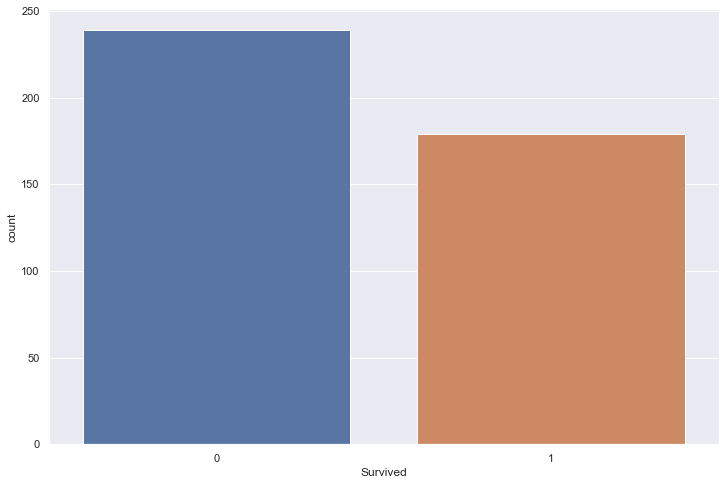

In [67]:
sns.countplot(result['Survived'])

In [68]:
result.shape

(418, 2)

In [69]:
result.to_csv('Prediction_18.csv',index=False)